In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
from matplotlib import pyplot as plt

In [1]:
IMAGE_SIZE=256
BATCH_SIZE=32
RGB_CHANNEL=3
EPOCHS=10

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\ADMIN\Desktop\ML and DL\dumy\data',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

NameError: name 'tf' is not defined

In [ ]:
class_names_=['NON-RECYCLABLE','RECYCLABLE']

In [ ]:
class_names_

['NON-RECYCLABLE', 'RECYCLABLE']

# No of Batch

In [ ]:
len(dataset)

79

In [ ]:
79*32

2528

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0]


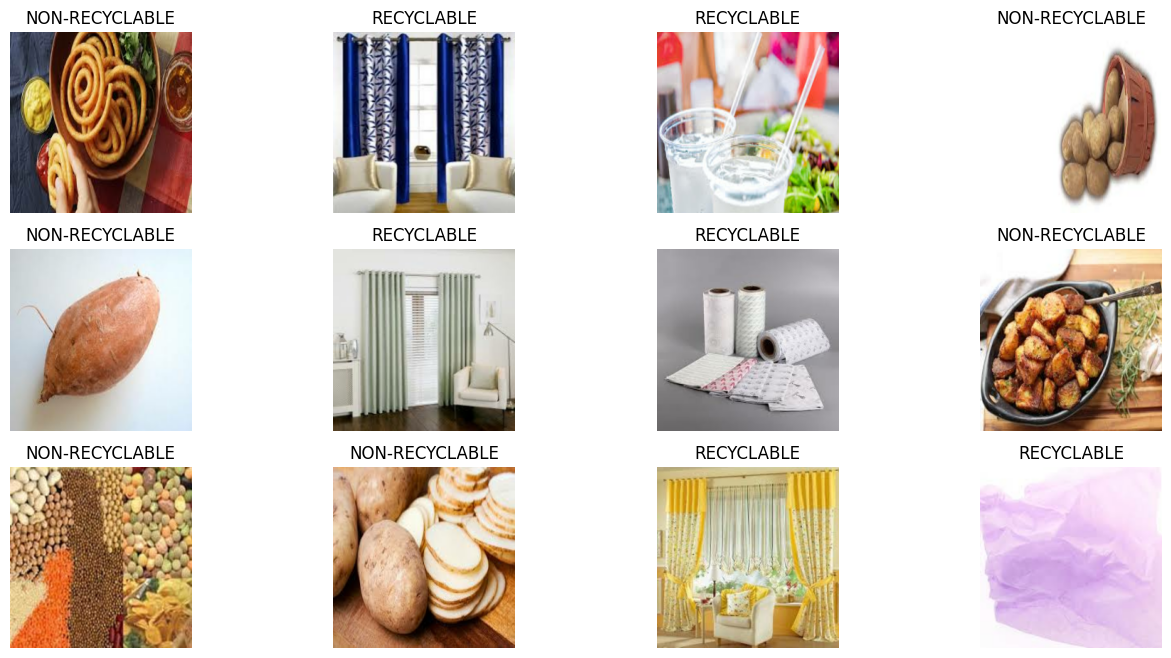

In [ ]:
plt.figure(figsize=(16,8))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(f'{class_names_[label_batch[i]]}')
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')


# Train test Split

In [ ]:
print("From the dataset we are going to use\n\t80% data for Training\n\t10% for Test\n\t10% for Validation")

From the dataset we are going to use
	80% data for Training
	10% for Test
	10% for Validation


In [ ]:
len(dataset)*0.8

63.2

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,valid_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(valid_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

63

In [ ]:
len(val_ds)

7

In [ ]:
len(test_ds)

9

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Preprocessing

In [ ]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_ad_vertical'),
    layers.RandomRotation(0.1)
])

# Model

In [ ]:
from tensorflow.keras import models

In [ ]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,RGB_CHANNEL)
no_of_classes=len(class_names_)

In [ ]:
no_of_classes

2

In [ ]:
model=models.Sequential([
    resize_rescale,
    # data_augmentation,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')#3 layers because 3 classes
])

c:\Users\ADMIN\Desktop\ML and DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(train_ds,epochs=30,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 492ms/step - accuracy: 0.6818 - loss: 0.5446 - val_accuracy: 0.9018 - val_loss: 0.2660
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.8886 - loss: 0.2973 - val_accuracy: 0.8839 - val_loss: 0.3163
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 472ms/step - accuracy: 0.9023 - loss: 0.2642 - val_accuracy: 0.9241 - val_loss: 0.1886
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 470ms/step - accuracy: 0.9208 - loss: 0.2267 - val_accuracy: 0.9375 - val_loss: 0.1547
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 473ms/step - accuracy: 0.9231 - loss: 0.1958 - val_accuracy: 0.9375 - val_loss: 0.1467
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.9237 - loss: 0.1967 - val_accuracy: 0.9509 - val_loss: 0.1264
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 468ms/step - accuracy: 0.9398 - loss: 0.1771 - val_accuracy: 0.9286 - val_loss: 0.1725
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 471ms/step - accuracy: 0.9347 - loss: 0.1726 - val_accu

In [ ]:
model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 682ms/step - accuracy: 0.9826 - loss: 0.0669


[0.08628465235233307, 0.9826388955116272]

In [ ]:
import numpy as np

In [ ]:
for iamges_batch,labels_batch in test_ds.take(1):
    print(f"Actual_label: {class_names_[label_batch[0].numpy().astype('uint8')]}")

    batch_pred=model.predict(image_batch)
    print(batch_pred[0])
    batch_pred=np.argmax(batch_pred[0])
    print(f"Predicted: {class_names_[batch_pred]}")
    plt.imshow(image_batch[0].numpy().astype('uint8'))
# model.predict()

NameError: name 'test_ds' is not defined

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    prediction_class=class_names_[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return prediction_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


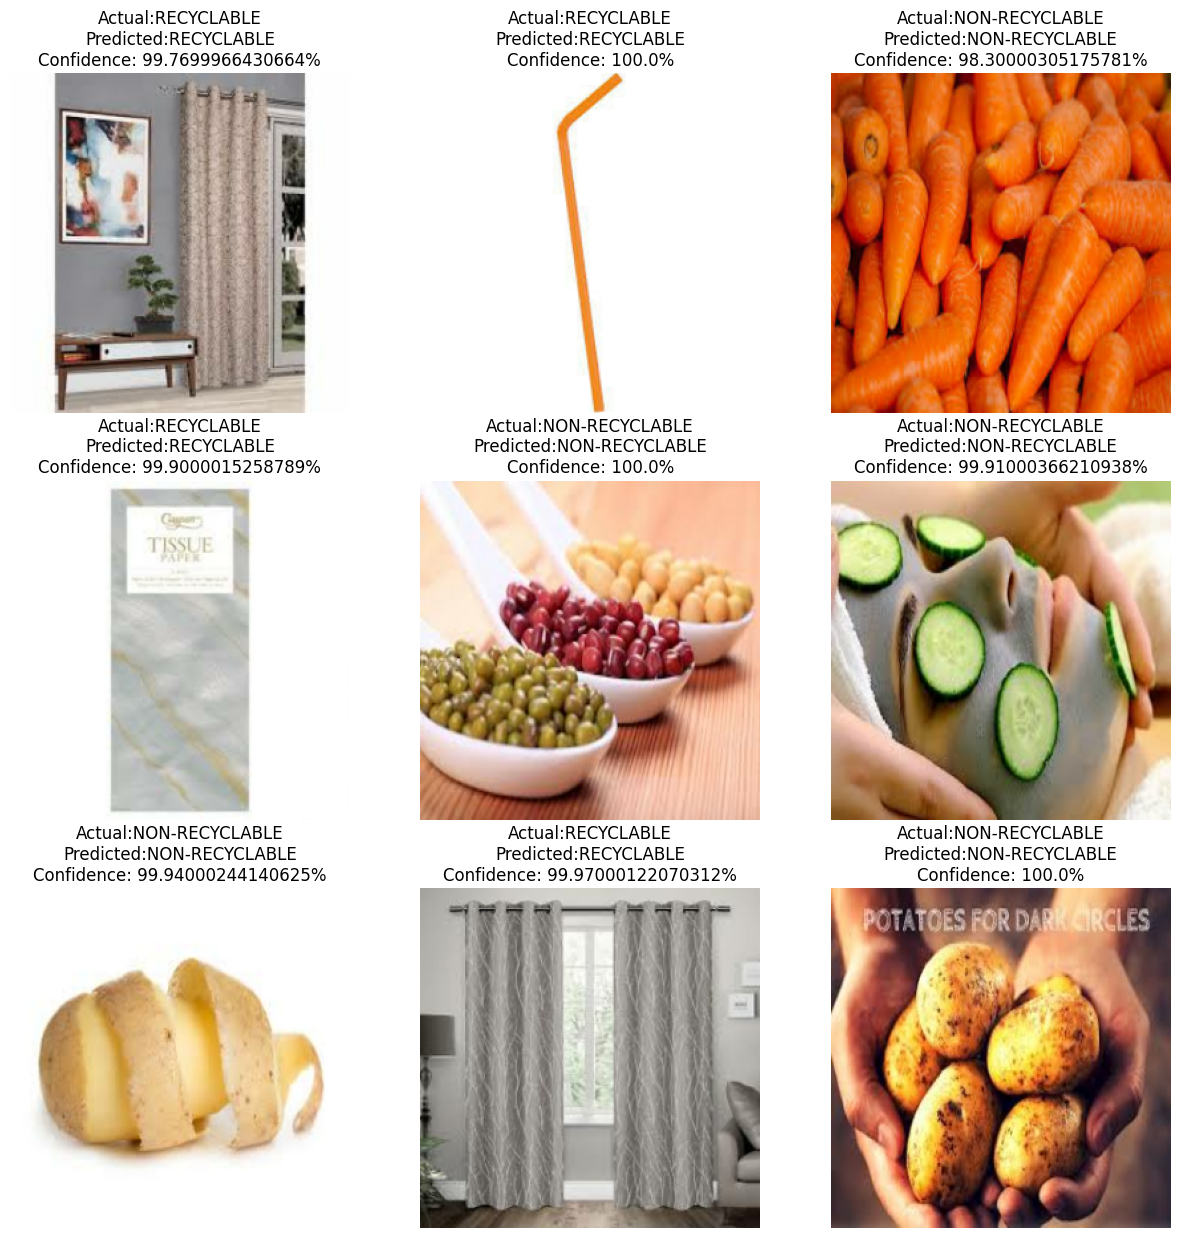

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        predicted_class,confidence=predict(model,images[i].numpy())
        plt.title(f'Actual:{class_names_[labels[i]]}\nPredicted:{predicted_class}\nConfidence: {confidence}%')
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
model_version=1
model.save(f"../model/{model_version}.keras")